# 图神经网络入门代码集
作者：丁雨山、彬斌
## 实战案例：搭建影视作品的图网络

In [1]:
import pandas as pd

# 加载数据
df = pd.read_csv('netflix_titles.csv')

# 取出导演属性，如果该属性的值为空，则返回空列表 [] ，否则返回所有导演列表
df['directors'] = df['director'].apply(lambda l: [] if pd.isna(l) else [i.strip() for i in l.split(",")])

# 取出演员属性，如果该属性的值为空，则返回空列表 [] ，否则返回所有演员列表
df['actors'] = df['cast'].apply(lambda l: [] if pd.isna(l) else [i.strip() for i in l.split(",")])

# 取出导演属性，如果该属性的值为空，则返回空列表 [] ，否则返回所有影视类型列表
df['categories'] = df['listed_in'].apply(lambda l: [] if pd.isna(l) else [i.strip() for i in l.split(",")])

# 取出国家属性，如果该属性的值为空，则返回空列表 [] ，否则返回所有国家列表
df['countries'] = df['country'].apply(lambda l: [] if pd.isna(l) else [i.strip() for i in l.split(",")])

# 取出我们需要的5个属性
df = df[["title", "directors", "actors", "categories", "countries"]]

df

,title,directors,actors,categories,countries
0,Norm of the North: King Sized Adventure,"[Richard Finn, Tim Maltby]","[Alan Marriott, Andrew Toth, Brian Dobson, Col...","[Children & Family Movies, Comedies]","[United States, India, South Korea, China]"
1,Jandino: Whatever it Takes,[],[Jandino Asporaat],[Stand-Up Comedy],[United Kingdom]
2,Transformers Prime,[],"[Peter Cullen, Sumalee Montano, Frank Welker, ...",[Kids' TV],[United States]
3,Transformers: Robots in Disguise,[],"[Will Friedle, Darren Criss, Constance Zimmer,...",[Kids' TV],[United States]
4,#realityhigh,[Fernando Lebrija],"[Nesta Cooper, Kate Walsh, John Michael Higgin...",[Comedies],[United States]
...,...,...,...,...,...
6229,Red vs. Blue,[],"[Burnie Burns, Jason Saldaña, Gustavo Sorola, ...","[TV Action & Adventure, TV Comedies, TV Sci-Fi...",[United States]
6230,Maron,[],"[Marc Maron, Judd Hirsch, Josh Brener, Nora Ze...",[TV Comedies],[United States]
6231,Little Baby Bum: Nursery Rhyme Friends,[],[],[Movies],[]
6232,A Young Doctor's Notebook and Other Stories,[],"[Daniel Radcliffe, Jon Hamm, Adam Godley, Chri...","[British TV Shows, TV Comedies, TV Dramas]",[United Kingdom]


In [2]:
import networkx as nx

# 初始化一个图网络 graph network (gn)
gn = nx.Graph(label="Netflix")

# 遍历数据来给图网络添加节点和边
for i, row in df.iterrows():
    # 添加影视节点
    gn.add_node(row['title'], label="MOVIE")
    
    # 遍历演员列表
    for actor in row['actors']:
        
        # 添加人物节点
        gn.add_node(actor, label="PERSON")
        
        # 添加该人物与该影视之间的边，关系为 ACTED_IN
        gn.add_edge(row['title'], actor, label="ACTED_IN")
    
    # 遍历导演列表
    for director in row['directors']:
        
        # 添加人物节点
        gn.add_node(director, label="PERSON")
        
        # 添加该人物与该影视之间的边， 关系为 DERECTED_BY
        gn.add_edge(row['title'], director, label="DERECTED_BY")
    
    # 遍历影视类型列表
    for cat in row['categories']:
        
        # 添加影视类型节点
        gn.add_node(cat, label="CATEGORY")
        
        # 添加该影视类型与该影视之间的边， 关系为 CATEGORY_IN
        gn.add_edge(row['title'], cat, label="CATEGORY_IN")
    
    # 遍历涉及的国家列表
    for cou in row['countries']:
        
        # 添加国家节点
        gn.add_node(cou, label="COUNTRY")
        
        # 添加该国家与该影视之间的边， 关系为 COUNTRY_IN
        gn.add_edge(row['title'], cou, label="COUNTRY_IN")


In [3]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = [14,14]



def get_adjacent_nodes(G, nodes):
    sub_graph=set()
    for n in nodes:
        sub_graph.add(n)
        for e in G.neighbors(n):        
            sub_graph.add(e)
    return list(sub_graph)

def draw_sub_graph(G, sub_graph):
    
    # 从图网络 G 中取出子图 sub_graph
    subgraph = G.subgraph(sub_graph)
    pos = nx.spring_layout(subgraph)
    
    # 为每一种图节点标注一种颜色和大小
    node_colors=[]
    node_sizes = []
    for n in subgraph.nodes():
        if G.nodes[n]['label'] == "MOVIE":
            node_colors.append('blue')
            node_sizes.append(700)
        elif G.nodes[n]['label'] == "PERSON":
            node_colors.append('red')
            node_sizes.append(600)
        elif G.nodes[n]['label'] == "CATEGORY":
            node_colors.append('green')
            node_sizes.append(500)
        elif G.nodes[n]['label'] == "COUNTRY":
            node_colors.append('yellow')
            node_sizes.append(400)
            
    nx.draw(subgraph, pos, with_labels=True, node_color=node_colors, node_size=node_sizes, width=2, font_size=15)
    
    # 给每一条边绘制 label
    edge_labels = {}
    for e in subgraph.edges():
        if G.edges[e]['label'] == "ACTED_IN":
            edge_labels[e] = "ACTED_IN"
        if G.edges[e]['label'] == "DERECTED_BY":
            edge_labels[e] = "DERECTED_BY"
        if G.edges[e]['label'] == "CATEGORY_IN":
            edge_labels[e] = "CATEGORY_IN"
        if G.edges[e]['label'] == "COUNTRY_IN":
            edge_labels[e] = "COUNTRY_IN"
    nx.draw_networkx_edge_labels(subgraph, pos, edge_labels=edge_labels, font_color="red")
    

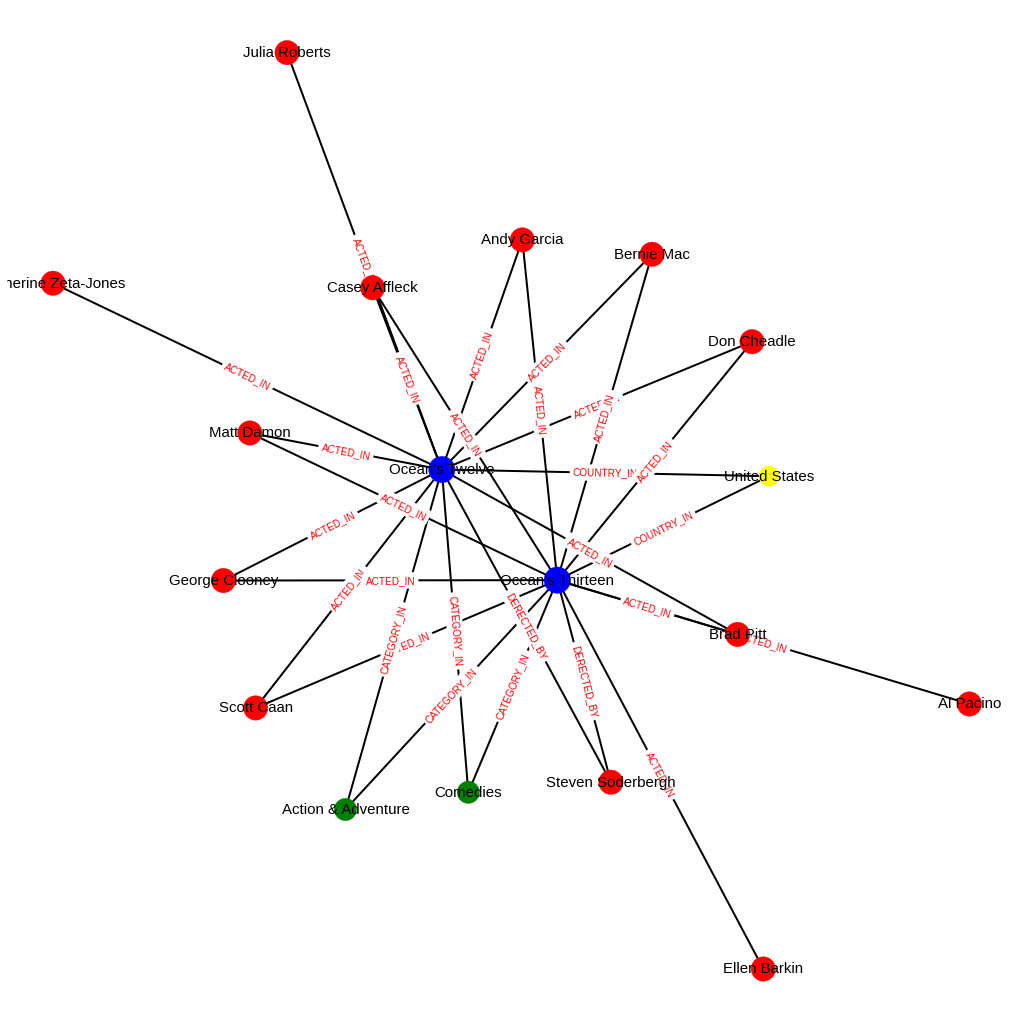

In [4]:
nodes = ["Ocean's Twelve", "Ocean's Thirteen"]
sub_graph = get_adjacent_nodes(gn, nodes)

draw_sub_graph(gn, sub_graph)

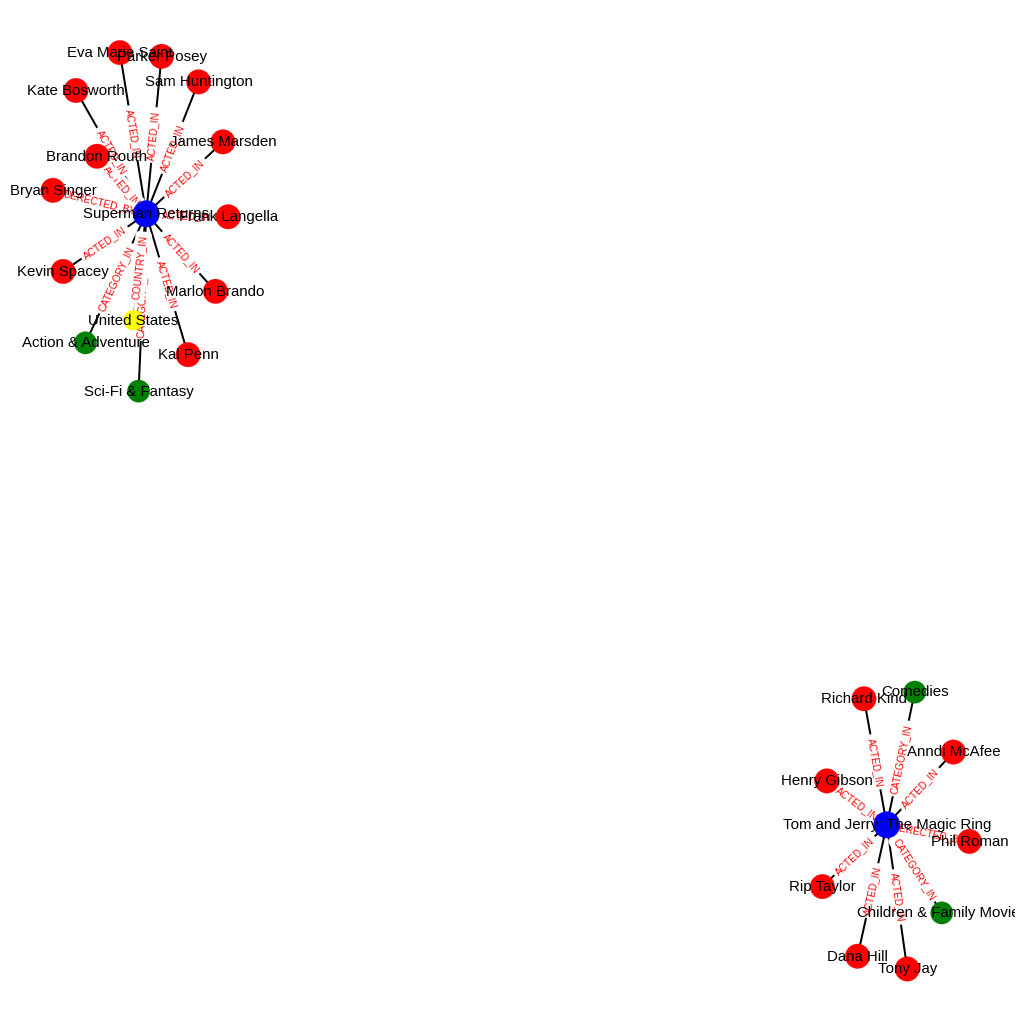

In [5]:
nodes = ["Superman Returns", "Tom and Jerry: The Magic Ring"]
sub_graph = get_adjacent_nodes(gn, nodes)

draw_sub_graph(gn, sub_graph)

In [6]:
path = nx.shortest_path(gn, "Superman Returns", "Tom and Jerry: The Magic Ring")
print("最短路径图节点：")
print(path)
print("\n")

print("最短路径图节点以及它们直接的关系：")
for i in range(len(path) - 1):
    print("{}\t{}\t{}".format(path[i], path[i+1], gn.edges[(path[i], path[i+1])]["label"]))

最短路径图节点：
['Superman Returns', 'Brandon Routh', 'Scott Pilgrim vs. the World', 'Comedies', 'Tom and Jerry: The Magic Ring']


最短路径图节点以及它们直接的关系：
Superman Returns	Brandon Routh	ACTED_IN
Brandon Routh	Scott Pilgrim vs. the World	ACTED_IN
Scott Pilgrim vs. the World	Comedies	CATEGORY_IN
Comedies	Tom and Jerry: The Magic Ring	CATEGORY_IN


## 四步理解图网络模型

In [10]:
# ! pip install node2vec

import pandas as pd
import networkx as nx


# 加载数据
df = pd.read_csv('netflix_titles.csv')

# 取出导演属性，如果该属性的值为空，则返回空列表 [] ，否则返回所有导演列表
df['directors'] = df['director'].apply(lambda l: [] if pd.isna(l) else [i.strip() for i in l.split(",")])

# 取出演员属性，如果该属性的值为空，则返回空列表 [] ，否则返回所有演员列表
df['actors'] = df['cast'].apply(lambda l: [] if pd.isna(l) else [i.strip() for i in l.split(",")])

# 取出导演属性，如果该属性的值为空，则返回空列表 [] ，否则返回所有影视类型列表
df['categories'] = df['listed_in'].apply(lambda l: [] if pd.isna(l) else [i.strip() for i in l.split(",")])

# 取出国家属性，如果该属性的值为空，则返回空列表 [] ，否则返回所有国家列表
df['countries'] = df['country'].apply(lambda l: [] if pd.isna(l) else [i.strip() for i in l.split(",")])

# 取出我们需要的5个属性
df = df[["title", "directors", "actors", "categories", "countries"]]


# 初始化一个图网络 graph network (gn)
gn = nx.Graph(label="Netflix")

# 遍历数据来给图网络添加节点和边
for i, row in df.iterrows():
    
    # 添加影视节点
    gn.add_node(row['title'], label="MOVIE")
    
    # 遍历演员列表
    for actor in row['actors']:
        
        # 添加人物节点
        gn.add_node(actor, label="PERSON")
        
        # 添加该人物与该影视之间的边，关系为 ACTED_IN
        gn.add_edge(row['title'], actor, label="ACTED_IN")
    
    # 遍历导演列表
    for director in row['directors']:
        
        # 添加人物节点
        gn.add_node(director, label="PERSON")
        
        # 添加该人物与该影视之间的边， 关系为 DERECTED_BY
        gn.add_edge(row['title'], director, label="DERECTED_BY")
    
    # 遍历影视类型列表
    for cat in row['categories']:
        
        # 添加影视类型节点
        gn.add_node(cat, label="CATEGORY")
        
        # 添加该影视类型与该影视之间的边， 关系为 CATEGORY_IN
        gn.add_edge(row['title'], cat, label="CATEGORY_IN")
    
    # 遍历涉及的国家列表
    for cou in row['countries']:
        
        # 添加国家节点
        gn.add_node(cou, label="COUNTRY")
        
        # 添加该国家与该影视之间的边， 关系为 COUNTRY_IN
        gn.add_edge(row['title'], cou, label="COUNTRY_IN")

        
# Node2Vec

from node2vec import Node2Vec

n2v = Node2Vec(gn, dimensions=100, walk_length=16, num_walks=10)
model = n2v.fit(window=5, min_count=1)

Generating walks (CPU: 1): 100%|██████████| 10/10 [05:55<00:00, 35.59s/it]


In [11]:
# generate similiar movies to given genre or title
def print_similiar(name):
    for node, _ in model.most_similar(name):
        print(node)

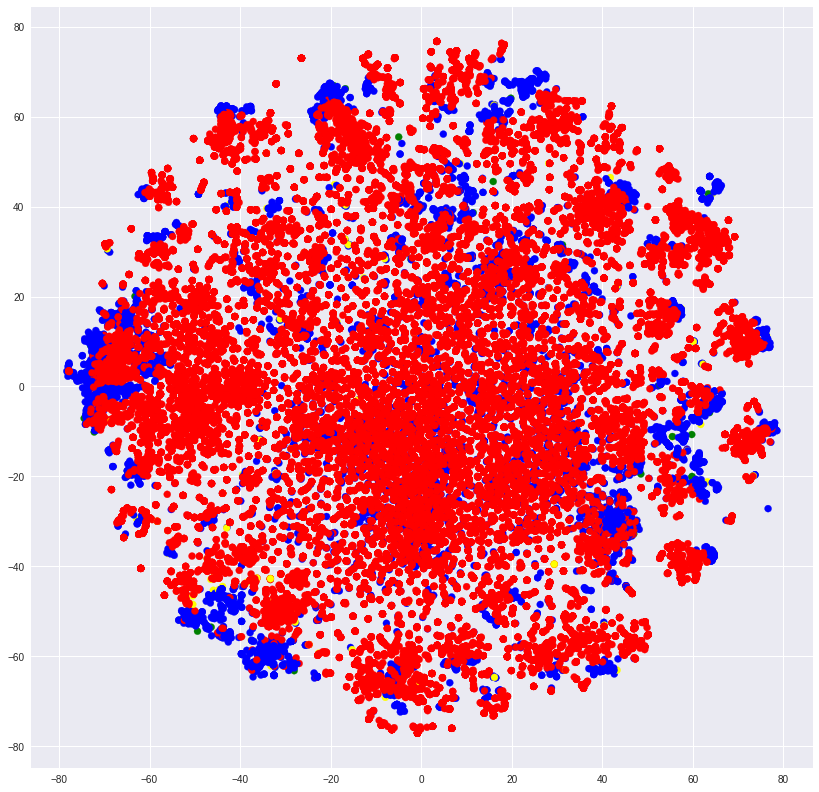

In [12]:
from sklearn.manifold import TSNE

# # 定义 TSNE，映射至2维空间
tsne = TSNE(n_components=2)
# # 从训练好的 Node2Vec 中取出 Node Embedding
node_embeddings = model.wv.vectors
node_embeddings_2d = tsne.fit_transform(node_embeddings)

# 在画图前，我们将每一个节点按 label 区分不同的颜色
node_ids = model.wv.index2word 
node_labels = [gn.nodes[node_id]["label"] for node_id in node_ids]
label_map = {
    "MOVIE":"blue",
    "PERSON":"red",
    "CATEGORY":"green",
    "COUNTRY":"yellow"
}

node_colours = [ label_map[lab] for lab in node_labels]

plt.figure()
plt.scatter(node_embeddings_2d[:,0], 
            node_embeddings_2d[:,1], 
            c=node_colours, cmap="jet")

In [13]:
label_map = {
    "MOVIE":"blue",
    "PERSON":"red",
    "CATEGORY":"green",
    "COUNTRY":"yellow"
}


def draw_n2v_sub_graph(nodes, markers):
    '''
    nodes: list of string，影视作品名称列表
    markers: list of string, 用不同的标记绘制不同的影视作品
    '''
    fig = plt.figure()
    ax = fig.add_subplot(111)

    for node, marker in zip(nodes, markers):
        
        sub_graph_emb_x = []
        sub_graph_emb_y = []
        sub_graph_title = []
        sub_graph_targets = []
        color_cls = []
        for n in get_adjacent_nodes(gn, [node]):
            sub_graph_title.append(n)
            n_id = model.wv.index2word.index(n)
            sub_graph_emb_x.append(node_embeddings_2d[n_id, 0])
            sub_graph_emb_y.append(node_embeddings_2d[n_id, 1])
            sub_graph_targets.append(gn.nodes[n]["label"])
            color_cls.append(label_map[gn.nodes[n]["label"]])


        ax.scatter(sub_graph_emb_x, sub_graph_emb_y, s=300, c=color_cls, marker=marker, cmap="jet", label=node)

        for emb_x, emb_y, emb_title in zip(sub_graph_emb_x, sub_graph_emb_y, sub_graph_title):
            ax.annotate(emb_title, (emb_x, emb_y), textcoords="offset points", xytext=(0,10), ha='center', size=16)

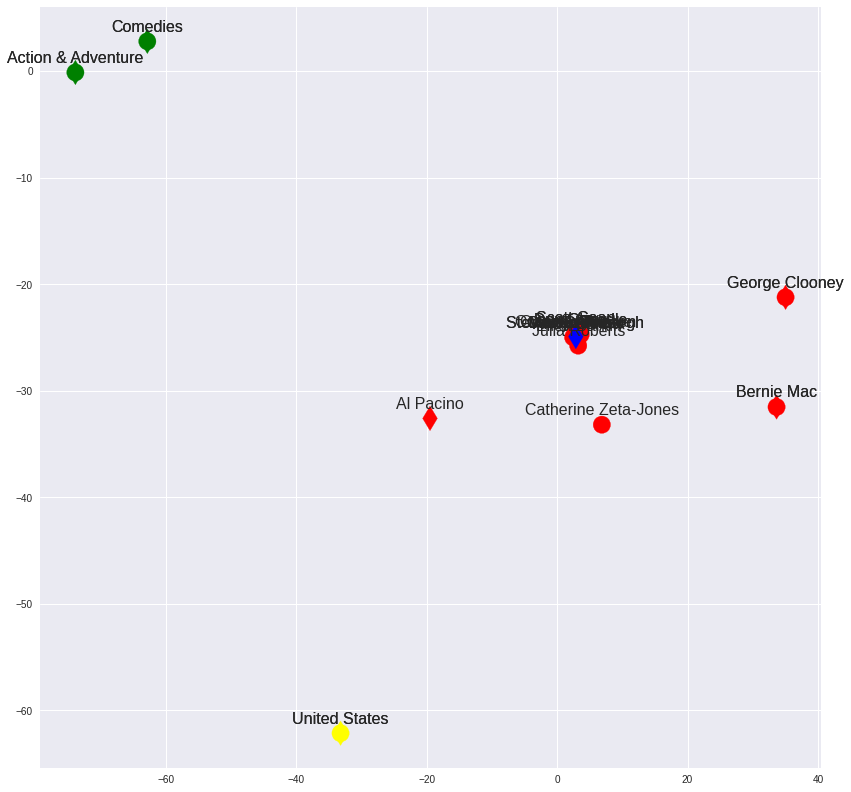

In [14]:
draw_n2v_sub_graph(["Ocean's Twelve", "Ocean's Thirteen"], ["o", "d"]) 

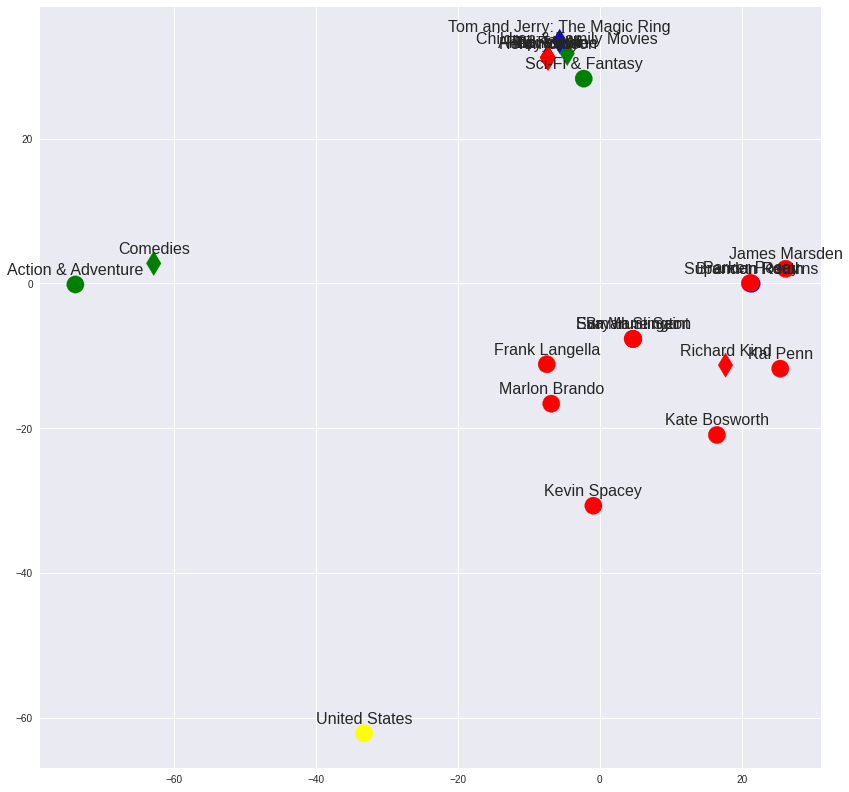

In [15]:
draw_n2v_sub_graph(["Superman Returns", "Tom and Jerry: The Magic Ring"], ["o", "d"])

## node2vec 模型搭建影视作品推荐系统

In [16]:
import math
import pandas as pd
import numpy as np


def get_recommendation(G, root, label):
	# 在图G中，使用 Adamic/Adar 公式，根据root节点以及label标签进行推荐
	# 使用字典记录共同邻居，字典中的key，value表示root与key的共同邻居是value
    commons_dict = {}
	# 遍历root节点附近的邻居e1
    for e1 in G.neighbors(root):
	    # 遍历e1附近的邻居e2
        for e2 in G.neighbors(e1):
		 # 假如e2为root节点本身，则跳过
            if e2 == root:
                continue
			# 判断e2节点的标签是否符合需求
            if G.nodes[e2]['label'] == label:
			    # 将e1加入 root与e2 的共同邻居集合
                commons = commons_dict.get(e2)
                if commons==None:
                    commons_dict.update({e2 : [e1]})
                else:
                    commons.append(e1)
                    commons_dict.update({e2 : commons})
    nodes =[]
    weight=[]
	# 根据Adamic/Adar公式计算相似度
    for key, values in commons_dict.items():
        w = 0.0
        for e in values:
            w = w + 1 / math.log(G.degree(e))
        nodes.append(key) 
        weight.append(w)
    # 按相似度从高到低排序返回结果
    result = pd.Series(data=np.array(weight), index=nodes)
    result.sort_values(inplace=True, ascending=False)        
    return result

In [17]:
# 根据Ocean's Twelve推荐一批电影
recommends = get_recommendation(gn, "Ocean's Twelve", label="MOVIE")
print("*"*40+"\n Recommendation for 'Ocean's Twelve'\n"+"*"*40)
print(recommends.head())

****************************************
 Recommendation for 'Ocean's Twelve'
****************************************
Ocean's Thirteen                   6.459344
The Informant!                     1.346214
The Mask of Zorro                  1.194038
No Reservations                    1.179999
Charlie's Angels: Full Throttle    1.047707
dtype: float64


In [18]:
recommends = get_recommendation(gn, "Superman Returns", label="MOVIE")
print("*"*40+"\n Recommendation for 'Superman Returns'\n"+"*"*40)
print(recommends.head())

****************************************
 Recommendation for 'Superman Returns'
****************************************
The Box                 1.389212
21                      1.262419
Mutiny on the Bounty    1.194038
The Score               1.037425
Small Soldiers          1.031926
dtype: float64


In [19]:
recommends = get_recommendation(gn, "Tom and Jerry: The Magic Ring", label="MOVIE")
print("*"*40+"\n Recommendation for 'Tom and Jerry: The Magic Ring'\n"+"*"*40)
print(recommends.head())

****************************************
 Recommendation for 'Tom and Jerry: The Magic Ring'
****************************************
An American Tail: The Treasures of Manhattan Island    1.611265
Charlotte's Web                                        1.611265
Yellowbird                                             0.932479
Albion: The Enchanted Stallion                         0.789905
Obvious Child                                          0.763909
dtype: float64


In [20]:
recommends = get_recommendation(gn, "Brad Pitt", label="PERSON")
print("*"*40+"\n Recommendation for 'Brad Pitt'\n"+"*"*40)
print(recommends.head())

****************************************
 Recommendation for 'Brad Pitt'
****************************************
George Clooney    0.757846
Matt Damon        0.757846
Andy Garcia       0.757846
Don Cheadle       0.757846
Bernie Mac        0.757846
dtype: float64


In [21]:
def get_recommendation_by_n2v(name):
    for node, _ in model.most_similar(name):
        print(node)

get_recommendation_by_n2v("Ocean's Twelve")

Ocean's Thirteen
Casey Affleck
Bernie Mac
Steven Soderbergh
Matt Damon
Andy Garcia
Ellen Barkin
Scott Caan
Don Cheadle
Catherine Zeta-Jones


/home/zhuguowei/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


In [22]:
model.wv.save_word2vec_format("./models/netflix_n2v")
model.save("./models/netflix_n2v_model")

FileNotFoundError: [Errno 2] No such file or directory: './models/netflix_n2v'

## 基于图卷积神经网络的图节点分类

In [23]:
! wget https://linqs-data.soe.ucsc.edu/public/lbc/cora.tgz
! tar -xf cora.tgz

! ls cora

--2020-11-24 14:39:53--  https://linqs-data.soe.ucsc.edu/public/lbc/cora.tgz
Resolving linqs-data.soe.ucsc.edu (linqs-data.soe.ucsc.edu)... 128.114.47.74
Connecting to linqs-data.soe.ucsc.edu (linqs-data.soe.ucsc.edu)|128.114.47.74|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168052 (164K) [application/x-gzip]
Saving to: ‘cora.tgz’

cora.tgz            100%[===================>] 164.11K  86.6KB/s    in 1.9s    

2020-11-24 14:39:56 (86.6 KB/s) - ‘cora.tgz’ saved [168052/168052]

cora.cites  cora.content  README


In [24]:
import pandas as pd
# 将数据读入dataFrame数据结构
raw_data = pd.read_csv('cora/cora.content',sep = '\t',header = None)
 # 样本点数2708
num = raw_data.shape[0]
print("样本点数", num)
raw_data

样本点数 2708


,0,1,2,3,4,5,6,7,8,9,...,1425,1426,1427,1428,1429,1430,1431,1432,1433,1434
0,31336,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,Neural_Networks
1,1061127,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,Rule_Learning
2,1106406,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Reinforcement_Learning
3,13195,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Reinforcement_Learning
4,37879,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Probabilistic_Methods
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2703,1128975,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Genetic_Algorithms
2704,1128977,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Genetic_Algorithms
2705,1128978,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Genetic_Algorithms
2706,117328,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Case_Based


In [25]:
print('论文id：', raw_data[0][0])

论文id： 31336


In [26]:
# 第一篇论文的bag of words向量
raw_data.iloc[0:1, 1:1434]

,1,2,3,4,5,6,7,8,9,10,...,1424,1425,1426,1427,1428,1429,1430,1431,1432,1433
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [27]:
print('论文出现词语数量：', raw_data.iloc[0:1, 1:1434].sum(1)[0])

论文出现词语数量： 20


In [28]:
print('论文类型：', raw_data.iloc[0, 1434])

论文类型： Neural_Networks


In [29]:
# 论文引用数据
raw_data_cites = pd.read_csv('cora/cora.cites',sep = '\t',header = None)
raw_data_cites[:10]

,0,1
0,35,1033
1,35,103482
2,35,103515
3,35,1050679
4,35,1103960
5,35,1103985
6,35,1109199
7,35,1112911
8,35,1113438
9,35,1113831


In [30]:
import numpy as np
import scipy.sparse as sp
import torch


def encode_onehot(labels):
    """
    将标签变为onehot向量
    """
    classes = set(labels)
    classes_dict = {c: np.identity(len(classes))[i, :] for i, c in
                    enumerate(classes)}
    labels_onehot = np.array(list(map(classes_dict.get, labels)),
                             dtype=np.int32)
    return labels_onehot

def load_data(path="./cora/", dataset="cora"):
    """Load citation network dataset (cora only for now)"""
    print('Loading {} dataset...'.format(dataset))

    idx_features_labels = np.genfromtxt("{}{}.content".format(path, dataset),
                                        dtype=np.dtype(str))
    features = sp.csr_matrix(idx_features_labels[:, 1:-1], dtype=np.float32)
    labels = encode_onehot(idx_features_labels[:, -1])

    # build graph
    idx = np.array(idx_features_labels[:, 0], dtype=np.int32)
    idx_map = {j: i for i, j in enumerate(idx)}
    edges_unordered = np.genfromtxt("{}{}.cites".format(path, dataset),
                                    dtype=np.int32)
    edges = np.array(list(map(idx_map.get, edges_unordered.flatten())),
                     dtype=np.int32).reshape(edges_unordered.shape)
    adj = sp.coo_matrix((np.ones(edges.shape[0]), (edges[:, 0], edges[:, 1])),
                        shape=(labels.shape[0], labels.shape[0]),
                        dtype=np.float32)

    # build symmetric adjacency matrix
    adj = adj + adj.T.multiply(adj.T > adj) - adj.multiply(adj.T > adj)

    features = normalize(features)
    adj = normalize(adj + sp.eye(adj.shape[0]))

    idx_train = range(140)
    idx_val = range(200, 500)
    idx_test = range(500, 1500)

    features = torch.FloatTensor(np.array(features.todense()))
    labels = torch.LongTensor(np.where(labels)[1])
    adj = sparse_mx_to_torch_sparse_tensor(adj)

    idx_train = torch.LongTensor(idx_train)
    idx_val = torch.LongTensor(idx_val)
    idx_test = torch.LongTensor(idx_test)

    return adj, features, labels, idx_train, idx_val, idx_test

def normalize(mx):
    """
    按行对稀疏矩阵进行归一化
    """
    rowsum = np.array(mx.sum(1))
    r_inv = np.power(rowsum, -1).flatten()
    r_inv[np.isinf(r_inv)] = 0.
    r_mat_inv = sp.diags(r_inv)
    mx = r_mat_inv.dot(mx)
    return mx

def sparse_mx_to_torch_sparse_tensor(sparse_mx):
    """
    将一个稀疏矩阵从scipy格式转化为torch格式
    """
    sparse_mx = sparse_mx.tocoo().astype(np.float32)
    indices = torch.from_numpy(
        np.vstack((sparse_mx.row, sparse_mx.col)).astype(np.int64))
    values = torch.from_numpy(sparse_mx.data)
    shape = torch.Size(sparse_mx.shape)
    return torch.sparse.FloatTensor(indices, values, shape)

def accuracy(output, labels):
    """
    准确率计算方法
    """
    preds = output.max(1)[1].type_as(labels)
    correct = preds.eq(labels).double()
    correct = correct.sum()
    return correct / len(labels)

In [31]:
# content数据转换为numpy向量
idx_features_labels = np.array(raw_data)
# 将每篇论文的词袋向量取出作为每篇文章的特征向量并存储为稀疏矩阵格式
features = sp.csr_matrix(idx_features_labels[:, 1:-1], dtype=np.float32)
# 将每篇论文的类型取出作为label并转换成one hot向量
labels = encode_onehot(idx_features_labels[:, -1])

# 取出每篇论文的id
idx = np.array(idx_features_labels[:, 0], dtype=np.int32)
# 将论文id映射到[0, 2708这个区间]
idx_map = {j: i for i, j in enumerate(idx)}

# cites数据转换为numpy向量
edges_unordered = np.array(raw_data_cites)
# 将cites数据中的id映射到[0, 2708这个区间]
edges = np.array(list(map(idx_map.get, edges_unordered.flatten())),
                 dtype=np.int32).reshape(edges_unordered.shape)
# 将论文间的引用关系存储成稀疏矩阵格式
adj = sp.coo_matrix((np.ones(edges.shape[0]), (edges[:, 0], edges[:, 1])),
                    shape=(labels.shape[0], labels.shape[0]),
                    dtype=np.float32)

# 构建对称的邻接矩阵
adj = adj + adj.T.multiply(adj.T > adj) - adj.multiply(adj.T > adj)

# 对文章的特征进行归一化
features = normalize(features)
# 【先将邻接矩阵加上一个单位矩阵，然后对其进行归一化】对邻接矩阵进行归一化
adj = normalize(adj + sp.eye(adj.shape[0]))

# 产出最终的向量
idx_train = range(140)
idx_val = range(200, 500)
idx_test = range(500, 1500)

features = torch.FloatTensor(np.array(features.todense()))
labels = torch.LongTensor(np.where(labels)[1])
adj = sparse_mx_to_torch_sparse_tensor(adj)

idx_train = torch.LongTensor(idx_train)
idx_val = torch.LongTensor(idx_val)
idx_test = torch.LongTensor(idx_test)

In [32]:
import math
import torch

from torch.nn.parameter import Parameter
from torch.nn.modules.module import Module


class GraphConvolution(Module):
    """
    图卷积的一个简单实现，具体可以参考论文 https://arxiv.org/abs/1609.02907
    ...
    Attributes
    ----------
    in_features : int
        图卷积输入特征向量的大小，即 $|H^{(l)}|$
    out_features : int
        图卷积输出向量的大小，即 $|H^{(l+1)}|$
    bias : bool
        是否使用偏置向量，默认为 True，即默认是使用偏置向量
    weight: Parameter
        图卷积中可训练的参数，
        
    Methods
    -------
    __init__(self, in_features, out_features, bias=True)
        图卷积的构造函数，定义输入特征的大小，输出向量的大小，是否使用偏置，参数
    reset_parameters(self)
        初始化图卷积中的参数
    forward(self, input, adj)
        前向传播函数，input 是特征输入，adj 是变换后的邻接矩阵 $N(A)=D^{-1}\tilde{A}$。完成前向传播的计算逻辑，$N(A) H^{(l)} W^{(l)}$
    __repr__(self)
        重构类名表达
    """

    def __init__(self, in_features, out_features, bias=True):
        super(GraphConvolution, self).__init__()
        self.in_features = in_features
        self.out_features = out_features
        self.weight = Parameter(torch.FloatTensor(in_features, out_features))
        if bias:
            self.bias = Parameter(torch.FloatTensor(out_features))
        else:
            self.register_parameter('bias', None)
        self.reset_parameters()

    def reset_parameters(self):
        stdv = 1. / math.sqrt(self.weight.size(1))
        self.weight.data.uniform_(-stdv, stdv)
        if self.bias is not None:
            self.bias.data.uniform_(-stdv, stdv)

    def forward(self, input, adj):
        # H * W
        support = torch.mm(input, self.weight)
        # N(A) * H * W
        output = torch.spmm(adj, support)
        if self.bias is not None:
            # N(A) * H * W + b
            return output + self.bias
        else:
            return output

    def __repr__(self):
        return self.__class__.__name__ + ' (' + str(self.in_features) + ' -> ' + str(self.out_features) + ')'

In [34]:
import torch.nn as nn
import torch.nn.functional as F


class GCN(nn.Module):
    '''
    两层图卷积神经网络模型
    ...
    Attributes
    ----------
    n_feat : int
        图网络输入特征向量的大小
    n_hid : int
        隐藏层维度大小，即第一层图卷积层的输出向量的大小
    n_class : int
        分类器类别数量
    dropout: float
        dropout 率
        
    Methods
    -------
    __init__(self, n_feat, n_hid, n_class, dropout)
        两层图卷积神经网络构造函数，定义输入 feature 的维度，隐藏层维度，分类器类别数量，dropout 率
    forward(self, x, adj)
        前向传播函数，x 是图网络输入 feature，adj 是已经变换过的邻接矩阵 $N(A)$
    '''
    def __init__(self, n_feat, n_hid, n_class, dropout):
        super(GCN, self).__init__()
        # 定义第一层图卷积层，输入是图网络 feature，维度是 n_feat，输出维度是 n_hid
        self.gc1 = GraphConvolution(n_feat, n_hid)
        # 定义第二层图卷积层，输入是第一层的输出向量，维度是 n_hid，输出是分类器在各个类别上的概率
        self.gc2 = GraphConvolution(n_hid, n_class)
        # 定义熟悉 dropout 率
        self.dropout = dropout

    def forward(self, x, adj):
        # 第一层卷积层的输出，并经过非线性激活函数 Relu 的输出
        x = F.relu(self.gc1(x, adj))
        # dropout
        x = F.dropout(x, self.dropout, training=self.training)
        # 第二层卷积层的输出，映射到输出类别维度
        x = self.gc2(x, adj)
        # 计算 log softmax
        return F.log_softmax(x, dim=1)

In [35]:
import time
import argparse
import numpy as np

import torch
import torch.nn.functional as F
import torch.optim as optim


# 训练超参配置
class Args:
    no_cuda = False     # 是否使用 cuda/gpu
    seed = 42           # 设置随机种子
    epochs = 200        # 迭代次数
    lr = 0.01           # 学习率
    weight_decay = 5e-4 # 学习率衰减
    hidden = 16         # 隐藏层维度
    dropout = 0.5       # dropout 率



args = Args()
# 是否使用 gpu/cuda
args.cuda = not args.no_cuda and torch.cuda.is_available()
# 设置随机种子
np.random.seed(args.seed)
torch.manual_seed(args.seed)
if args.cuda:
    torch.cuda.manual_seed(args.seed)

# 加载数据，包括变换后的邻接矩阵，图网络输入 feature，分类标签，训练数据，验证数据，测试数据
adj, features, labels, idx_train, idx_val, idx_test = load_data()

# 利用定义好的两层图卷积神经网络模型来构造一个 GCN 实例，
# 图网络输入 feature 维度为 features.shape[1]
# 隐藏层维度为 args.hidden
# 分类输出类别数量为 labels.max().item() + 1
# dropout 率为 args.dropout
model = GCN(n_feat=features.shape[1],
            n_hid=args.hidden,
            n_class=labels.max().item() + 1,
            dropout=args.dropout)

# 构造一个 Adam 优化器，
# 需要优化的参数是 GCN 模型里的可训练参数
# 学习率设置为 args.lr
# 学习率衰减是 args.weight_decay
optimizer = optim.Adam(model.parameters(),
                       lr=args.lr, 
                       weight_decay=args.weight_decay)


# 模型训练函数，epoch 为第几次迭代
def train(epoch):
    # 记录第 epoch 次迭代的开始时间
    t = time.time()
    # 标记 GCN 模型处于 train mode
    model.train()
    # 在每一个 epoch 都需要先清空之前计算过的梯度
    optimizer.zero_grad()
    # 将图网络输入 feature 和变换后的邻接矩阵 adj 输入至两层图卷积神经网络 GCN 模型中，经过前向传播得到输出，该输出即为在分类类别上的预测概率
    output = model(features, adj)
    # 根据训练集的数据索引找到对应的输出概率和标签，由此计算损失 loss，以及准确率
    loss_train = F.nll_loss(output[idx_train], labels[idx_train])
    acc_train = accuracy(output[idx_train], labels[idx_train])
    # 误差反向传播
    loss_train.backward()
    # 优化器开始进行优化 GCN 中的可训练参数
    optimizer.step()

    
    # 利用验证集数据对该 epoch 训练结果进行验证。验证过程需要关闭train mode 并打开 eval model
    model.eval()
    # 同样进行前向传播
    output = model(features, adj)
    # 根据验证集的数据索引找到对应的输出概率和标签，由此计算损失 loss，以及准确率
    loss_val = F.nll_loss(output[idx_val], labels[idx_val])
    acc_val = accuracy(output[idx_val], labels[idx_val])
    
    # 打印所有的结果，以及所需要的时间
    print('Epoch: {:04d}'.format(epoch+1),
          'loss_train: {:.4f}'.format(loss_train.item()),
          'acc_train: {:.4f}'.format(acc_train.item()),
          'loss_val: {:.4f}'.format(loss_val.item()),
          'acc_val: {:.4f}'.format(acc_val.item()),
          'time: {:.4f}s'.format(time.time() - t))

# 记录模型训练开始的时间
t_start = time.time()
# 开始迭代训练 GCN 模型，迭代次数设置为 args.epochs
for epoch in range(args.epochs):
    train(epoch)
    
print("模型训练完成！")
print("模型训练总耗时: {:.4f}s".format(time.time() - t_start))

Loading cora dataset...
Epoch: 0001 loss_train: 1.9858 acc_train: 0.0714 loss_val: 1.9679 acc_val: 0.0933 time: 0.0369s
Epoch: 0002 loss_train: 1.9723 acc_train: 0.0929 loss_val: 1.9563 acc_val: 0.1200 time: 0.0106s
Epoch: 0003 loss_train: 1.9628 acc_train: 0.1143 loss_val: 1.9449 acc_val: 0.1133 time: 0.0104s
Epoch: 0004 loss_train: 1.9441 acc_train: 0.1071 loss_val: 1.9338 acc_val: 0.1200 time: 0.0104s
Epoch: 0005 loss_train: 1.9360 acc_train: 0.1071 loss_val: 1.9227 acc_val: 0.3900 time: 0.0104s
Epoch: 0006 loss_train: 1.9220 acc_train: 0.2643 loss_val: 1.9114 acc_val: 0.3500 time: 0.0104s
Epoch: 0007 loss_train: 1.9125 acc_train: 0.3000 loss_val: 1.9001 acc_val: 0.3500 time: 0.0102s
Epoch: 0008 loss_train: 1.9002 acc_train: 0.3286 loss_val: 1.8889 acc_val: 0.3500 time: 0.0107s
Epoch: 0009 loss_train: 1.8878 acc_train: 0.3000 loss_val: 1.8777 acc_val: 0.3500 time: 0.0104s
Epoch: 0010 loss_train: 1.8734 acc_train: 0.3357 loss_val: 1.8665 acc_val: 0.3500 time: 0.0102s
Epoch: 0011 loss

Epoch: 0111 loss_train: 0.7181 acc_train: 0.8643 loss_val: 0.9591 acc_val: 0.7900 time: 0.0071s
Epoch: 0112 loss_train: 0.7573 acc_train: 0.8429 loss_val: 0.9539 acc_val: 0.7900 time: 0.0106s
Epoch: 0113 loss_train: 0.7469 acc_train: 0.8429 loss_val: 0.9487 acc_val: 0.7900 time: 0.0107s
Epoch: 0114 loss_train: 0.7922 acc_train: 0.8214 loss_val: 0.9443 acc_val: 0.7900 time: 0.0076s
Epoch: 0115 loss_train: 0.7474 acc_train: 0.8643 loss_val: 0.9402 acc_val: 0.7900 time: 0.0074s
Epoch: 0116 loss_train: 0.7510 acc_train: 0.8429 loss_val: 0.9352 acc_val: 0.7900 time: 0.0066s
Epoch: 0117 loss_train: 0.7229 acc_train: 0.8643 loss_val: 0.9302 acc_val: 0.7900 time: 0.0064s
Epoch: 0118 loss_train: 0.7613 acc_train: 0.8357 loss_val: 0.9249 acc_val: 0.7900 time: 0.0065s
Epoch: 0119 loss_train: 0.7013 acc_train: 0.8571 loss_val: 0.9196 acc_val: 0.7933 time: 0.0066s
Epoch: 0120 loss_train: 0.7120 acc_train: 0.8500 loss_val: 0.9150 acc_val: 0.7933 time: 0.0063s
Epoch: 0121 loss_train: 0.7470 acc_train

Epoch: 0198 loss_train: 0.4356 acc_train: 0.9071 loss_val: 0.7137 acc_val: 0.8067 time: 0.0079s
Epoch: 0199 loss_train: 0.4434 acc_train: 0.9286 loss_val: 0.7132 acc_val: 0.8067 time: 0.0065s
Epoch: 0200 loss_train: 0.4567 acc_train: 0.9286 loss_val: 0.7122 acc_val: 0.8067 time: 0.0089s
模型训练完成！
模型训练总耗时: 1.7003s


In [36]:
# 模型测试函数
def test():
    # 首先标记模型为 eval mode
    model.eval()
    # 将图网络输入 feature 和变换后的邻接矩阵 adj 输入至两层图卷积神经网络 GCN 模型中，经过前向传播得到输出，该输出即为在分类类别上的预测概率
    output = model(features, adj)
    # 根据测试集的数据索引找到对应的输出概率和标签，由此计算损失 loss，以及准确率
    loss_test = F.nll_loss(output[idx_test], labels[idx_test])
    acc_test = accuracy(output[idx_test], labels[idx_test])
    # 打印测试结果
    print("Test set results:",
          "loss= {:.4f}".format(loss_test.item()),
          "accuracy= {:.4f}".format(acc_test.item()))
    
    
test()

Test set results: loss= 0.7580 accuracy= 0.8220


## 基于图卷积神经网络的链接预测

In [43]:
import torch
import numpy as np
import pandas as pd
import networkx as nx
import scipy.sparse as sp

def encode_onehot(labels):
    """
    将标签变为onehot向量
    """
    classes = set(labels)
    classes_dict = {c: np.identity(len(classes))[i, :] for i, c in
                    enumerate(classes)}
    labels_onehot = np.array(list(map(classes_dict.get, labels)),
                             dtype=np.int32)
    return labels_onehot

def sparse_mx_to_torch_sparse_tensor(sparse_mx):
    """
    将scipy稀疏矩阵转换成torch稀疏矩阵
    """
    # 取出矩阵中每个不为0的值的坐标
    sparse_mx = sparse_mx.tocoo().astype(np.float32)
    # 坐标转化为numpy格式
    indices = torch.from_numpy(
        np.vstack((sparse_mx.row, sparse_mx.col)).astype(np.int64))
    # 取出矩阵中的值，转化为torch格式
    values = torch.from_numpy(sparse_mx.data)
    # 获得矩阵的形状，转化为torch格式
    shape = torch.Size(sparse_mx.shape)
    # 返回torch格式的稀疏矩阵
    return torch.sparse.FloatTensor(indices, values, shape)

def sparse_to_tuple(sparse_mx):
    """
    将scipy稀疏矩阵转换成三元组，包括（坐标，值，矩阵形状）
    """
    if not sp.isspmatrix_coo(sparse_mx):
        sparse_mx = sparse_mx.tocoo()
    coords = np.vstack((sparse_mx.row, sparse_mx.col)).transpose()
    values = sparse_mx.data
    shape = sparse_mx.shape
    return coords, values, shape

def preprocess_graph(adj):
    """
    图的预处理，包括归一化操作
    """
    adj = sp.coo_matrix(adj)
    adj_ = adj + sp.eye(adj.shape[0])
    rowsum = np.array(adj_.sum(1))
    degree_mat_inv_sqrt = sp.diags(np.power(rowsum, -0.5).flatten())
    adj_normalized = adj_.dot(degree_mat_inv_sqrt).transpose().dot(degree_mat_inv_sqrt).tocoo()
    return sparse_mx_to_torch_sparse_tensor(adj_normalized)

def mask_test_edges(adj):
    """
    数据集划分，随机将10%的边作为测试集
    """

    # 将对角线上的值去掉
    adj = adj - sp.dia_matrix((adj.diagonal()[np.newaxis, :], [0]), shape=adj.shape)
    adj.eliminate_zeros()

    adj_triu = sp.triu(adj)
    adj_tuple = sparse_to_tuple(adj_triu)
    edges = adj_tuple[0]
    edges_all = sparse_to_tuple(adj)[0]
    num_test = int(np.floor(edges.shape[0] / 10.))
    num_val = int(np.floor(edges.shape[0] / 20.))

    all_edge_idx = list(range(edges.shape[0]))
    np.random.shuffle(all_edge_idx)
    val_edge_idx = all_edge_idx[:num_val]
    test_edge_idx = all_edge_idx[num_val:(num_val + num_test)]
    test_edges = edges[test_edge_idx]
    val_edges = edges[val_edge_idx]
    train_edges = np.delete(edges, np.hstack([test_edge_idx, val_edge_idx]), axis=0)

    def ismember(a, b, tol=5):
        rows_close = np.all(np.round(a - b[:, None], tol) == 0, axis=-1)
        return np.any(rows_close)

    test_edges_false = []
    while len(test_edges_false) < len(test_edges):
        idx_i = np.random.randint(0, adj.shape[0])
        idx_j = np.random.randint(0, adj.shape[0])
        if idx_i == idx_j:
            continue
        if ismember([idx_i, idx_j], edges_all):
            continue
        if test_edges_false:
            if ismember([idx_j, idx_i], np.array(test_edges_false)):
                continue
            if ismember([idx_i, idx_j], np.array(test_edges_false)):
                continue
        test_edges_false.append([idx_i, idx_j])

    val_edges_false = []
    while len(val_edges_false) < len(val_edges):
        idx_i = np.random.randint(0, adj.shape[0])
        idx_j = np.random.randint(0, adj.shape[0])
        if idx_i == idx_j:
            continue
        if ismember([idx_i, idx_j], train_edges):
            continue
        if ismember([idx_j, idx_i], train_edges):
            continue
        if ismember([idx_i, idx_j], val_edges):
            continue
        if ismember([idx_j, idx_i], val_edges):
            continue
        if val_edges_false:
            if ismember([idx_j, idx_i], np.array(val_edges_false)):
                continue
            if ismember([idx_i, idx_j], np.array(val_edges_false)):
                continue
        val_edges_false.append([idx_i, idx_j])

    assert ~ismember(test_edges_false, edges_all)
    assert ~ismember(val_edges_false, edges_all)
    assert ~ismember(val_edges, train_edges)
    assert ~ismember(test_edges, train_edges)
    assert ~ismember(val_edges, test_edges)

    data = np.ones(train_edges.shape[0])

    # 重新构建邻接矩阵
    adj_train = sp.csr_matrix((data, (train_edges[:, 0], train_edges[:, 1])), shape=adj.shape)
    adj_train = adj_train + adj_train.T

    return adj_train, train_edges, val_edges, val_edges_false, test_edges, test_edges_false



In [44]:

# 将数据读入dataFrame数据结构
raw_data = pd.read_csv('cora/cora.content', sep='\t', header=None)
# 样本点数2708
num = raw_data.shape[0]
raw_data_cites = pd.read_csv('cora/cora.cites', sep='\t', header=None)
# content数据转换为numpy向量
idx_features_labels = np.array(raw_data)
# 将每篇论文的词袋向量取出作为每篇文章的特征向量并存储为稀疏矩阵格式
features = sp.csr_matrix(idx_features_labels[:, 1: -1], dtype=np.float32)

# 取出每篇论文的id
idx = np.array(idx_features_labels[:, 0], dtype=np.int32)
# 将论文id映射到[0, 2708这个区间]
idx_map = {j: i for i, j in enumerate(idx)}

# cites数据转换为numpy向量
edges_unordered = np.array(raw_data_cites)
# 将cites数据中的id映射到[0, 2708这个区间]
edges = np.array(list(map(idx_map.get, edges_unordered.flatten())),
                 dtype=np.int32).reshape(edges_unordered.shape)

label = encode_onehot(idx_features_labels[:, -1])
# 将论文间的引用关系存储成稀疏矩阵格式
adj = sp.coo_matrix((np.ones(edges.shape[0]), (edges[:, 0], edges[:, 1])),
                    shape=(label.shape[0], label.shape[0]),
                    dtype=np.float32)

features = torch.FloatTensor(np.array(features.todense()))
adj = nx.adjacency_matrix(nx.convert_matrix.from_scipy_sparse_matrix(adj))

# 把原始的邻接矩阵存下来方便后面评测用
adj_orig = adj
adj_orig = adj_orig - sp.dia_matrix((adj_orig.diagonal()[np.newaxis, :], [0]), shape=adj_orig.shape)
adj_orig.eliminate_zeros()

adj_train, train_edges, val_edges, val_edges_false, test_edges, test_edges_false = mask_test_edges(adj)
adj = adj_train

# 图的预处理
adj_norm = preprocess_graph(adj)
adj_label = adj_train + sp.eye(adj_train.shape[0])
adj_label = torch.FloatTensor(adj_label.toarray())

# 计算引用与引用两个关系之间的比值，用于后续训练
pos_weight = float(adj.shape[0] * adj.shape[0] - adj.sum()) / adj.sum()
# 正则项，用于后续训练
norm = adj.shape[0] * adj.shape[0] / float((adj.shape[0] * adj.shape[0] - adj.sum()) * 2)

In [45]:
import torch.nn as nn
import torch.nn.functional as F

class GCN4Link(nn.Module):
    '''
    两层图卷积神经网络模型
    ...
    Attributes
    ----------
    n_feat : int
        图网络输入特征向量的大小
    n_hid : int
        隐藏层维度大小
    n_class : int
        分类器类别数量
    dropout: float
        dropout 率

    Methods
    -------
    __init__(self, n_feat, n_hid, n_class, dropout)
        两层图卷积神经网络构造函数，定义输入 feature 的维度，隐藏层维度，分类器类别数量，dropout 率
    forward(self, x, adj)
        前向传播函数，x 是图网络输入 feature，adj 是已经变换过的邻接矩阵 $N(A)$
    '''

    def __init__(self, n_feat, n_hid, dropout):
        super(GCN4Link, self).__init__()
        # 定义第一层图卷积层，输入是图网络 feature，维度是 n_feat，输出维度是 n_hid
        self.gc1 = GraphConvolution(n_feat, n_hid)
        # 定义第二层图卷积层，输入维度是 n_hid，输出维度是 n_hid
        self.gc2 = GraphConvolution(n_hid, n_hid, dropout)
        # 定义熟悉 dropout 率
        self.dropout = dropout

    def forward(self, x, adj):
        # 第一层卷积层的输出，并经过非线性激活函数 Relu 的输出
        x = F.relu(self.gc1(x, adj))
        # dropout
        x = F.dropout(x, self.dropout, training=self.training)
        # 第二层卷积层的输出，映射到输出类别维度
        x = self.gc2(x, adj)

        # dropout增加模型鲁棒性 
        x = F.dropout(x, self.dropout, training=self.training)

        # 基于点乘计算每两个节点之间存在边的概率
        adj_preds = torch.mm(x, x.t())
        return adj_preds

In [46]:
# 训练超参配置
class Args:
    no_cuda = False     # 是否使用 cuda/gpu
    seed = 42           # 设置随机种子
    epochs = 500        # 迭代次数
    lr = 0.01           # 学习率
    hidden = 64         # 隐藏层维度
    dropout = 0.       # dropout 率

In [47]:
from sklearn.metrics import average_precision_score

def get_acc_score(emb, adj_orig, edges_pos, edges_neg):
    """
    评测预测的准确率
    """
    def sigmoid(x):
        return 1 / (1 + np.exp(-x))

    adj_rec = np.dot(emb, emb.T)
    # 得到每一个正例的预测分数
    preds = []
    pos = []
    for e in edges_pos:
        preds.append(sigmoid(adj_rec[e[0], e[1]]))
        pos.append(adj_orig[e[0], e[1]])
    # 得到每一个负例的预测分数
    preds_neg = []
    neg = []
    for e in edges_neg:
        preds_neg.append(sigmoid(adj_rec[e[0], e[1]]))
        neg.append(adj_orig[e[0], e[1]])
    # 合并预测分数与标准答案，使用sklearn.metrics里面自带的正确率评价器评测指标
    preds_all = np.hstack([preds, preds_neg])
    labels_all = np.hstack([np.ones(len(preds)), np.zeros(len(preds_neg))])
    acc_score = average_precision_score(labels_all, preds_all)

    return acc_score

In [48]:
from torch import optim
import time

args = Args()
# 是否使用 gpu/cuda
args.cuda = not args.no_cuda and torch.cuda.is_available()
# 设置随机种子
np.random.seed(args.seed)
torch.manual_seed(args.seed)
if args.cuda:
    torch.cuda.manual_seed(args.seed)
    
# 初始化模型
model = GCN4Link(n_feat=features.shape[1],
        n_hid=args.hidden,
        dropout=args.dropout)

# 定义模型优化器
optimizer = optim.Adam(model.parameters(), lr=args.lr)

# 开始训练
for epoch in range(args.epochs):
    t = time.time()
    model.train()
    optimizer.zero_grad()
    # 前向传播
    preds = model(features, adj_norm)
    # 使用binary_cross_entropy计算loss，使用之前计算好的norm与pos_weight调节 引用边 与 非引用边 的数量
    loss = norm * F.binary_cross_entropy_with_logits(preds, adj_label, pos_weight=torch.tensor(pos_weight))

    # 反向传播
    loss.backward()
    cur_loss = loss.item()
    # 更新参数
    optimizer.step()

    # 在验证集上测试模型效果
    acc_curr = get_acc_score(preds.data.numpy(), adj_orig, val_edges, val_edges_false)

    print("Epoch:", '%04d' % (epoch + 1), "train_loss=", "{:.5f}".format(cur_loss),
          "accurancy=", "{:.5f}".format(acc_curr),
          "time=", "{:.5f}".format(time.time() - t)
          )

print("Optimization Finished!")

Epoch: 0001 train_loss= 0.74218 accurancy= 0.50287 time= 0.21101
Epoch: 0002 train_loss= 1.28842 accurancy= 0.50000 time= 0.17591
Epoch: 0003 train_loss= 0.70537 accurancy= 0.50000 time= 0.17760
Epoch: 0004 train_loss= 0.71908 accurancy= 0.49715 time= 0.14554
Epoch: 0005 train_loss= 0.74769 accurancy= 0.50000 time= 0.18021
Epoch: 0006 train_loss= 0.72773 accurancy= 0.50000 time= 0.18209
Epoch: 0007 train_loss= 0.72044 accurancy= 0.50095 time= 0.20270
Epoch: 0008 train_loss= 0.71631 accurancy= 0.50096 time= 0.19130
Epoch: 0009 train_loss= 0.70634 accurancy= 0.49905 time= 0.20565
Epoch: 0010 train_loss= 0.69459 accurancy= 0.50191 time= 0.21062
Epoch: 0011 train_loss= 0.68230 accurancy= 0.50192 time= 0.20734


/home/zhuguowei/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in exp
  


Epoch: 0012 train_loss= 0.66299 accurancy= 0.50969 time= 0.21135
Epoch: 0013 train_loss= 0.63808 accurancy= 0.54277 time= 0.20993
Epoch: 0014 train_loss= 0.61246 accurancy= 0.58672 time= 0.19348
Epoch: 0015 train_loss= 0.58964 accurancy= 0.61319 time= 0.18145
Epoch: 0016 train_loss= 0.57074 accurancy= 0.62841 time= 0.16808
Epoch: 0017 train_loss= 0.55270 accurancy= 0.63779 time= 0.14612
Epoch: 0018 train_loss= 0.53985 accurancy= 0.64512 time= 0.15612
Epoch: 0019 train_loss= 0.53473 accurancy= 0.65119 time= 0.19558
Epoch: 0020 train_loss= 0.52902 accurancy= 0.65715 time= 0.16969
Epoch: 0021 train_loss= 0.52281 accurancy= 0.66256 time= 0.16968
Epoch: 0022 train_loss= 0.51769 accurancy= 0.66166 time= 0.17186
Epoch: 0023 train_loss= 0.51146 accurancy= 0.66337 time= 0.17626
Epoch: 0024 train_loss= 0.50531 accurancy= 0.65568 time= 0.16246
Epoch: 0025 train_loss= 0.50124 accurancy= 0.66024 time= 0.16663
Epoch: 0026 train_loss= 0.49884 accurancy= 0.65854 time= 0.14768
Epoch: 0027 train_loss= 0

Epoch: 0139 train_loss= 0.40362 accurancy= 0.73399 time= 0.16102
Epoch: 0140 train_loss= 0.40351 accurancy= 0.73402 time= 0.15916
Epoch: 0141 train_loss= 0.40340 accurancy= 0.73405 time= 0.16234
Epoch: 0142 train_loss= 0.40329 accurancy= 0.73410 time= 0.14353
Epoch: 0143 train_loss= 0.40318 accurancy= 0.73627 time= 0.16472
Epoch: 0144 train_loss= 0.40308 accurancy= 0.73838 time= 0.12465
Epoch: 0145 train_loss= 0.40297 accurancy= 0.73845 time= 0.16253
Epoch: 0146 train_loss= 0.40287 accurancy= 0.73853 time= 0.17110
Epoch: 0147 train_loss= 0.40278 accurancy= 0.73858 time= 0.14588
Epoch: 0148 train_loss= 0.40268 accurancy= 0.73928 time= 0.14167
Epoch: 0149 train_loss= 0.40258 accurancy= 0.73642 time= 0.14747
Epoch: 0150 train_loss= 0.40249 accurancy= 0.73708 time= 0.13841
Epoch: 0151 train_loss= 0.40240 accurancy= 0.73706 time= 0.13473
Epoch: 0152 train_loss= 0.40231 accurancy= 0.73488 time= 0.13498
Epoch: 0153 train_loss= 0.40225 accurancy= 0.73835 time= 0.12866
Epoch: 0154 train_loss= 0

Epoch: 0267 train_loss= 0.39605 accurancy= 0.77755 time= 0.15973
Epoch: 0268 train_loss= 0.39602 accurancy= 0.77686 time= 0.16170
Epoch: 0269 train_loss= 0.39598 accurancy= 0.77743 time= 0.16596
Epoch: 0270 train_loss= 0.39595 accurancy= 0.77611 time= 0.15724
Epoch: 0271 train_loss= 0.39592 accurancy= 0.77677 time= 0.17091
Epoch: 0272 train_loss= 0.39589 accurancy= 0.77612 time= 0.12436
Epoch: 0273 train_loss= 0.39587 accurancy= 0.77498 time= 0.15670
Epoch: 0274 train_loss= 0.39584 accurancy= 0.77202 time= 0.14228
Epoch: 0275 train_loss= 0.39581 accurancy= 0.77553 time= 0.13133
Epoch: 0276 train_loss= 0.39578 accurancy= 0.77493 time= 0.12934
Epoch: 0277 train_loss= 0.39575 accurancy= 0.77552 time= 0.12430
Epoch: 0278 train_loss= 0.39572 accurancy= 0.77486 time= 0.13772
Epoch: 0279 train_loss= 0.39569 accurancy= 0.77542 time= 0.13698
Epoch: 0280 train_loss= 0.39566 accurancy= 0.77716 time= 0.15416
Epoch: 0281 train_loss= 0.39563 accurancy= 0.77774 time= 0.15823
Epoch: 0282 train_loss= 0

Epoch: 0395 train_loss= 0.39162 accurancy= 0.76814 time= 0.13112
Epoch: 0396 train_loss= 0.39158 accurancy= 0.76813 time= 0.13078
Epoch: 0397 train_loss= 0.39155 accurancy= 0.76816 time= 0.11227
Epoch: 0398 train_loss= 0.39152 accurancy= 0.76816 time= 0.11201
Epoch: 0399 train_loss= 0.39148 accurancy= 0.77050 time= 0.13828
Epoch: 0400 train_loss= 0.39145 accurancy= 0.77049 time= 0.13611
Epoch: 0401 train_loss= 0.39142 accurancy= 0.77053 time= 0.13561
Epoch: 0402 train_loss= 0.39138 accurancy= 0.77047 time= 0.13007
Epoch: 0403 train_loss= 0.39135 accurancy= 0.77103 time= 0.12982
Epoch: 0404 train_loss= 0.39131 accurancy= 0.77051 time= 0.13504
Epoch: 0405 train_loss= 0.39128 accurancy= 0.77287 time= 0.14268
Epoch: 0406 train_loss= 0.39125 accurancy= 0.77284 time= 0.13589
Epoch: 0407 train_loss= 0.39121 accurancy= 0.77281 time= 0.13712
Epoch: 0408 train_loss= 0.39118 accurancy= 0.77520 time= 0.13219
Epoch: 0409 train_loss= 0.39114 accurancy= 0.77519 time= 0.11324
Epoch: 0410 train_loss= 0

In [49]:
model.eval()
# 在测试集上测试模型效果
acc = get_acc_score(preds.data.numpy(), adj_orig, test_edges, test_edges_false)
print('Test accurancy: ' + str(acc))

Test accurancy: 0.7673524686995736


/home/zhuguowei/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in exp
  
